Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Reading the Data

In [2]:
df = pd.read_csv("C:/Users/2068671/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/macrodata.csv", index_col= 0, parse_dates = True)

In [3]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [4]:
columns = df.columns.to_list()
columns

['year',
 'quarter',
 'realgdp',
 'realcons',
 'realinv',
 'realgovt',
 'realdpi',
 'cpi',
 'm1',
 'tbilrate',
 'unemp',
 'pop',
 'infl',
 'realint']

In [5]:
del_columns = ['year', 'quarter']

In [6]:
columns = list(set(columns)- set(del_columns))

In [7]:
columns

['tbilrate',
 'realdpi',
 'cpi',
 'pop',
 'realint',
 'realcons',
 'realinv',
 'infl',
 'unemp',
 'm1',
 'realgovt',
 'realgdp']

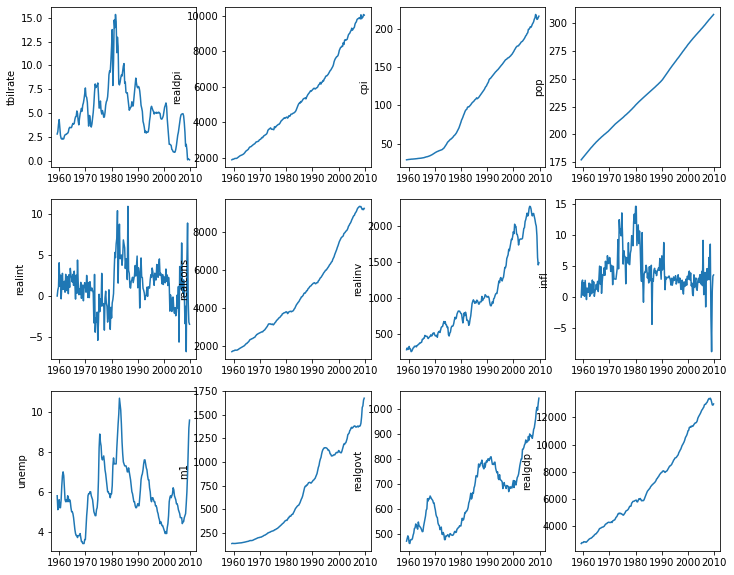

In [8]:
plt.figure(figsize=(12, 10))
for column in columns:
    plt.subplot(3,4,columns.index(column)+1)
    plt.plot(df[column])
    plt.ylabel(column)

The Hodrick-Prescott filter:

The HP filter separates the timeseries into a trend component and cyclical component.

In [9]:
import statsmodels

In [10]:
from statsmodels.tsa.filters.hp_filter import hpfilter

values for lambda: 

1600 for quarterly data                                          

6.25 for annual data

129600 for monthly data

In [11]:
gdp_cycle, gdp_trend = hpfilter(df["realgdp"], 1600)

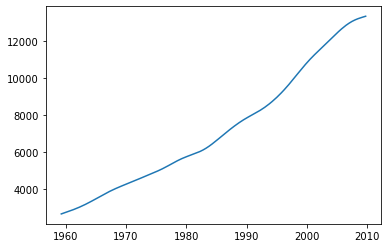

In [12]:
plt.plot(gdp_trend)

In [13]:
df["gdp_trend"] = gdp_trend

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

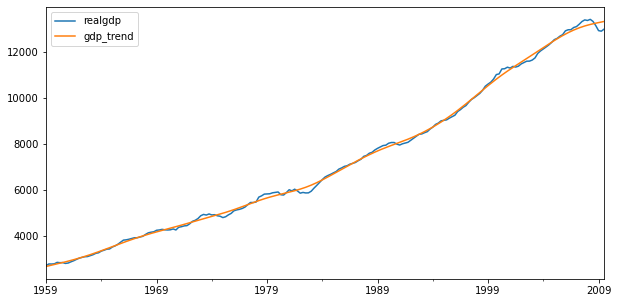

In [14]:
plt.figure()
df[["realgdp", "gdp_trend"]].plot(figsize = (10,5))

<AxesSubplot:>

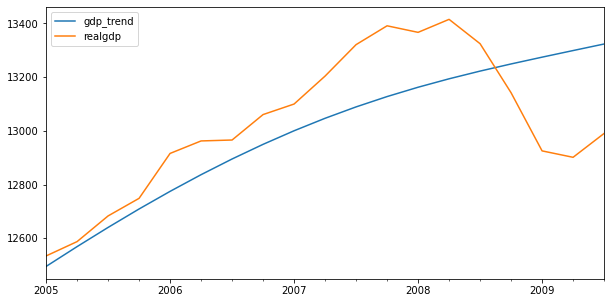

In [15]:
df[["gdp_trend", "realgdp"]]['2005-01-01': ].plot(figsize = (10,5))

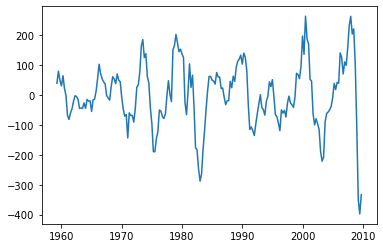

In [17]:
plt.plot(gdp_cycle)